## Top 3 Key Points

Clustering finds natural data groupings without labels

K-means forms clusters based on centroids and distance functions

Diagnostic plots and parallelization optimize k-means

## Reflection Questions

### **1. When might clustering offer useful business insights?**

When you don’t have labels but want to discover hidden patterns — e.g., grouping customers by behavior, finding product segments, or detecting anomalies.

---

### **2. What are some common use cases for k-means clustering?**

* Customer segmentation in marketing.
* Market basket analysis in retail.
* Image compression (reducing colors).
* Document/topic grouping in NLP.

---

### **3. How could you determine the optimal number of clusters?**

* **Elbow method** → plot variance explained vs. number of clusters.
* **Silhouette score** → measure how well each point fits its cluster.
* **Domain knowledge** → choose a number meaningful to the business.

---

### **4. Why scale clustering computations in parallel?**

Because clustering on large datasets is computationally heavy — parallelizing speeds up distance calculations and allows clustering to work on big data (e.g., Spark MLlib).

---

### **5. What challenges do unsupervised learning approaches present?**

* No ground truth → hard to validate results.
* Sensitive to scaling and initialization.
* May produce clusters that don’t align with business meaning.

---

## Challenge Exercises

Apply k-means clustering to a dataset

Create visual diagnostics to evaluate your clusters

Research scalable cluster computing options like Dask or Spark

Set up a parallel process to accelerate a slow computation

Compare k-means performance tuning k vs. distance metrics

# Apply k-means clustering

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


# Create Visual Diagnostics

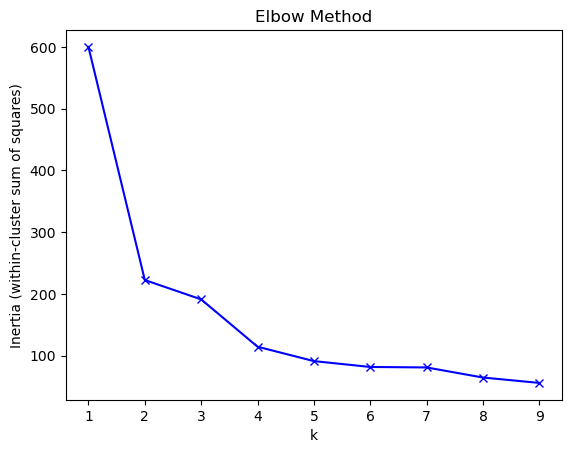

In [2]:
# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method")
plt.show()


# Challenge 3: Research scalable clustering options

Scikit-learn KMeans works for small datasets.

For large-scale data:

Dask → distributed NumPy & pandas, runs scalable KMeans.

Spark MLlib → clustering on terabyte-scale datasets.

(This step is research/theory — mention tools, don’t need to code Spark right now).

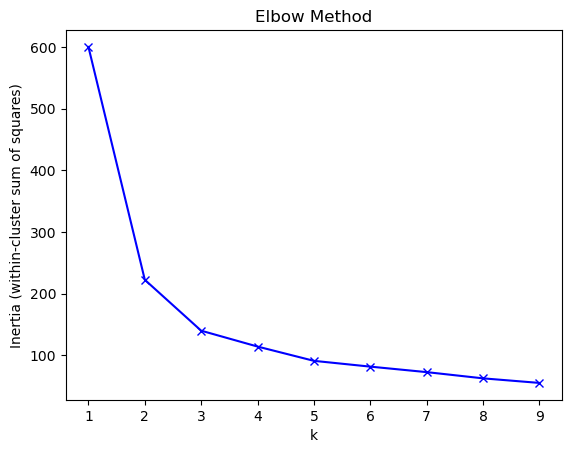

In [4]:
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, n_jobs=-1)  # -1 = use all cores
# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # -1 = use all cores
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method")
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

for k in [2, 3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.582
k=3, silhouette=0.480
k=4, silhouette=0.385
k=5, silhouette=0.345
